In [9]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Revenue Formula: 

$TR = (Q*P) - (Q*V+F)$

In [2]:
# Number of simulations
mc_sims = 100000000

# Random distributions for product as
brick_quantity_sold = np.random.uniform(170000, 300000, mc_sims)
brick_price = np.random.normal(0.45, 0.1, mc_sims)
brick_var_cost = np.random.normal(0.15, 0.005, mc_sims)

# Random distributions for product b
chim_quantity_sold = np.random.uniform(12000, 13000, mc_sims)
chim_price = np.random.normal(4.30, 0.1, mc_sims)
chim_var_cost = np.random.normal(3, 0.1, mc_sims)

# Random distributions for product c
head_quantity_sold = np.random.uniform(300, 350, mc_sims)
head_price = np.random.normal(120, 5, mc_sims)
head_var_cost = np.random.normal(90, 5, mc_sims)

# Profits of each product
bricks_total_profit = (brick_quantity_sold*brick_price) - (brick_quantity_sold*brick_var_cost)
chims_total_profit = (chim_quantity_sold*chim_price) - (chim_quantity_sold*chim_var_cost)
head_total_profit = (head_quantity_sold*head_price) - (head_quantity_sold*head_var_cost)

# Fixed cost
total_fixed_cost = 110000

# Revenue formula with all products
total_revenue = (bricks_total_profit + chims_total_profit + head_total_profit) - total_fixed_cost


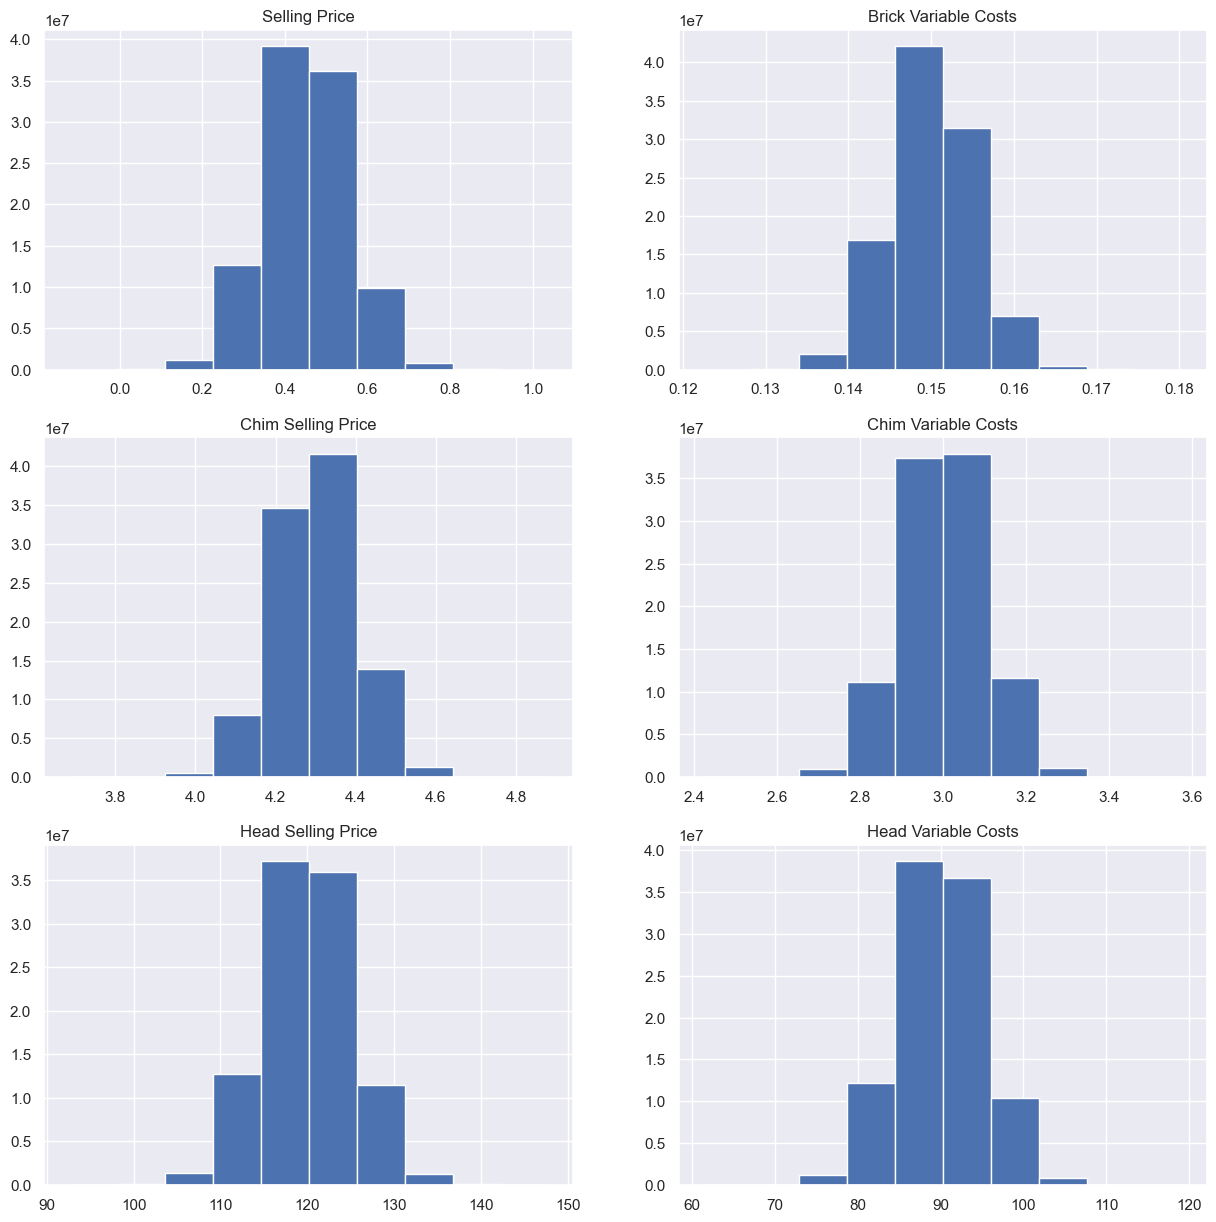

In [3]:
# Plots of distributions of product prices and marginal costs
fig = plt.figure(figsize=(15, 15))

ax1= plt.subplot(3,2,1)
plt.hist(brick_price)
ax1.set(title="Selling Price")

ax2 = plt.subplot(3,2,2)
plt.hist(brick_var_cost)
ax2.set(title="Brick Variable Costs")

ax3= plt.subplot(3,2,3)
plt.hist(chim_price)
ax3.set(title="Chim Selling Price")

ax4 = plt.subplot(3,2,4)
plt.hist(chim_var_cost)
ax4.set(title="Chim Variable Costs")

ax5 = plt.subplot(3,2,5)
plt.hist(head_price)
ax5.set(title="Head Selling Price")

ax6 = plt.subplot(3,2,6)
plt.hist(head_var_cost)
ax6.set(title="Head Variable Costs");


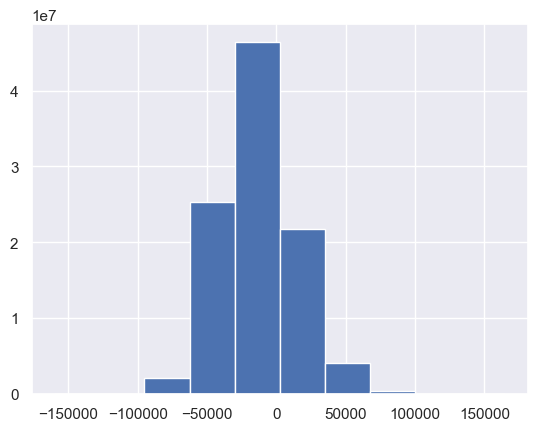

In [19]:
# Probability distribution of results
plt.hist(total_revenue);

In [14]:
# Statistics definition
mean = np.round(np.mean(total_revenue), 2)
std = np.round(np.std(total_revenue), 2)
mean_minus_std = np.round(np.mean(total_revenue)-np.std(total_revenue), 2)
mean_plus_std = np.round(np.mean(total_revenue)+np.std(total_revenue), 2)
mean_minus_2std = np.round((np.mean(total_revenue)-np.std(total_revenue)*2), 2)
mean_plus_2std = np.round((np.mean(total_revenue)+np.std(total_revenue)*2), 2)
twenty_five_percentile = np.round(np.percentile(total_revenue, 25), 2)
seventy_five_percentile = np.round(np.percentile(total_revenue, 75), 2)
loss_probability = np.round(np.sum(total_revenue<0)/mc_sims*100, 2)
more_than_10k = np.round(np.sum(total_revenue>10000)/mc_sims*100, 2)

# Dataframe from disctionary of descriptive statistics
dict = {"Mean Yearly Profit": mean,
        "Standard Deviation" : std,
        "68% Confidence": f"{mean_minus_std} to {mean_plus_std}",
        "95% Confidence": f"{mean_minus_2std} to {mean_plus_2std}",
        "25th percentile": twenty_five_percentile,
        "75th percentile": seventy_five_percentile,
        "Probability of Yearly Loss": f"{loss_probability}%",
        "Probability of more than 10k Yearly Profit": f"{more_than_10k}%"}

stats = pd.DataFrame.from_dict(data=dict, orient="index", columns=[""])

In [15]:
# Descriptive statistics and table
print(f"Expected profit is {mean} with a standard deviation of {std}")
print(f"68% probability of yearly total revenue between {mean_minus_std} and {mean_plus_std}")
print(f"95% probability of a yearly total revenue between {mean_minus_2std} and {mean_plus_2std}")
print(f"Loss probability of {loss_probability}%")
print(f"More than 10k win probability of {more_than_10k}%")
print(f"25th percentile: {twenty_five_percentile}")
print(f"75th percentile: {seventy_five_percentile}")
stats

Expected profit is -13500.97 with a standard deviation of 26518.84
68% probability of yearly total revenue between -40019.81 and 13017.86
95% probability of a yearly total revenue between -66538.64 and 39536.7
Loss probability of 71.1%
More than 10k win probability of 18.38%
25th percentile: -31941.07
75th percentile: 3379.55


,
Mean Yearly Profit,-13500.97
Standard Deviation,26518.84
68% Confidence,-40019.81 to 13017.86
95% Confidence,-66538.64 to 39536.7
25th percentile,-31941.07
75th percentile,3379.55
Probability of Yearly Loss,71.1%
Probability of more than 10k Yearly Profit,18.38%


Delivery of bad news. :(